# Расчёт определённого интеграла в Python с применением к ипотеке и строительству дома.

На этом занятии мы рассмотрим различные методы вычисления определенных интегралов с использованием библиотек Python, таких как SciPy, SymPy и NumPy. Мы сравним эти методы с точки зрения эффективности использования времени, памяти и точности. Наконец, мы применим эти методы к практическим задачам, таким как расчеты по ипотечным кредитам и сценарии строительства домов.

In [1]:
%pip install --quiet scipy numpy sympy matplotlib

## Задачи

1. Понять, как вычислять определенные интегралы с помощью SciPy, SymPy и NumPy.
2. Сравнить методы, основанные на эффективности использования времени, памяти и точности.
3. Применить методы вычисления интегралов к реальным задачам.

## Список упражнений:
- 1-4 Сравнительно простые на анализ реализаций методов
- 5 - Простейшее упражнение на понимание ипотечного калькулятора
- 7 - Скорее всего будет простым, расчёт стоимости материалов для строительства
- 11-13 - Творческие задания на применение изученных методов. Основное время вероятно может уйти на эти задания.
- Заключительное - подведение итогов
- 6,8,9,10 - Дополнительные задания для тех, кто сделал все предыдущие и хочет углубиться в эту тему.

Итого обязательные задания (10): 1,2,3,4,5,7,11,12,13 и заключительное

## 1. Вычисление определенных интегралов с помощью SciPy

Ссылка на документацию: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [28]:
from scipy.integrate import quad, trapezoid, cumulative_trapezoid, simpson, romb
import numpy as np

# Define the function to integrate
def f(x):
    return np.exp(-x ** 2)

# Calculate the definite integral of f(x) from 0 to π
result_quad, error_quad = quad(f, -1, 1) # Integrate func from a to b using a technique from the Fortran library QUADPACK
print("SciPy Result:", result_quad)
print("Estimated Error:", error_quad)
print("_____")


# Generate sample points
x = np.linspace(-1, 1, 1025)
y = f(x)

result_trapezoid = trapezoid(y, x)
result_cumulative = cumulative_trapezoid(y, x=x)
result_simpson = simpson(y, x=x)
result_romb = romb(y, dx=2/2**10)

print("SciPy Trapezoid Result:", result_trapezoid)
print("SciPy Cumulative Trapezoid Result:", result_cumulative[-1])
print("SciPy Simpson Result:", result_simpson)
print("SciPy Romberg Result:", result_romb)

SciPy Result: 1.493648265624854
Estimated Error: 1.6582826951881447e-14
_____
SciPy Trapezoid Result: 1.4936477978418952
SciPy Cumulative Trapezoid Result: 1.4936477978418947
SciPy Simpson Result: 1.493648265625092
SciPy Romberg Result: 1.493648265624854


### Упражнение 1
- Измените функцию `f(x)` в **ячейке выше**, чтобы вычислить интеграл от $e^{-x^2}$ от -1 до 1.
- Проанализируйте полученные результаты и ошибку.

### Анализ

*   **quad**: Самый точный, с наименьшей оценкой погрешности.
*   **trapezoid**: Менее точный, чем quad, но все еще неплох.
*   **cumulative_trapezoid**: Такой же, как и trapezoid; возвращает массив.
*   **simpson**: Более точный, чем trapezoid.
*   **romb**: Высокая точность; требует числа точек в виде \(2^k + 1\).

В целом, `quad` - самый точный. Другие методы быстрее, но потенциально менее точны, и они все еще аппроксимируют интеграл разумно.

## 2. Вычисление определенных интегралов с помощью SymPy

Ссылка на документацию: https://docs.sympy.org/latest/modules/integrals/integrals.html#

In [29]:
from sympy import symbols, integrate, sin, pi

# Define the variable and function
x = symbols('x')
f = sin(x) ** 2

# Calculate the definite integral of f(x) from 0 to π
result = integrate(f, (x, 0, pi))
print("SymPy Result:", result)

SymPy Result: pi/2


### Упражнение 2
Измените код **в ячейке ниже**: с помощью SymPy вычислите интеграл от $x ^ 3 - 4x + 1$ от -2 до 2. Сравните результат с помощью SciPy.

In [36]:
sympy_int = integrate(x**3 - 4*x + 1, (x, -2, 2))
scipy_int, err = quad(lambda x: x**3 - 4*x + 1, -2, 2)

print(f"{sympy_int=} {scipy_int=} {err=}")
print(f"Difference: {np.abs(sympy_int - scipy_int)}")

sympy_int=4 scipy_int=3.9999999999999996 err=9.282160601123169e-14
Difference: 4.44089209850063E-16


## 3. Вычисление определенных интегралов с помощью NumPy

Ссылка на документацию: https://numpy.org/doc/stable/reference/generated/numpy.trapezoid.html

NumPy Result: 0.999999793971382
SciPy Trapezoid Result: 0.999999793971382
SymPy Result: 1.00000000000000
Difference: [0.0, 2.060286180549653e-07, 2.060286180549653e-07]


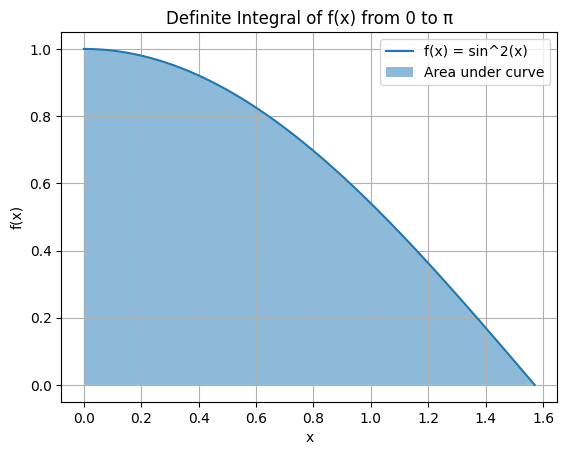

In [48]:
# Define the function to integrate
def f(x):
    return np.cos(x)

# Generate sample points
x = np.linspace(0, np.pi / 2, 1000)
y = f(x)

# Use the trapezoidal rule to approximate the integral
result_np = np.trapezoid(y, x)
print("NumPy Result:", result_np)

# Here we could also use the `scipy.integrate.trapezoid` method
result_scipy = trapezoid(y, x)
print("SciPy Trapezoid Result:", result_scipy)

# Use SymPy to compute the integral symbolically
from sympy import cos
from itertools import combinations

x_sym = symbols('x')
f_sym = cos(x_sym)
result_sympy = integrate(f_sym, (x_sym, 0, np.pi / 2))
print("SymPy Result:", result_sympy)

print(f"Difference: {[float(np.abs(l - r)) for l, r in combinations((result_np, result_scipy, result_sympy), 2)]}")

# Plotting the function and the area under the curve
import matplotlib.pyplot as plt
plt.plot(x, y, label='f(x) = sin^2(x)')
plt.fill_between(x, y, alpha=0.5, label='Area under curve')
plt.title('Definite Integral of f(x) from 0 to π')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


### Упражнение 3
- Измените **ячейку выше**: измените функцию `f(x)`, чтобы вычислить интеграл от $\cos(x)$ от 0 до $\pi/2$ с помощью NumPy.
- Сравните результат с помощью SciPy и SymPy.

### Анализ

1.  **Точность.** Результаты, полученные с помощью NumPy и SciPy, очень близки друг к другу, поскольку оба используют правило трапеций для численного приближения интеграла. SymPy, с другой стороны, вычисляет интеграл символически, обеспечивая точный результат.
2.  **Численный и символический метод.** NumPy и SciPy предоставляют численные приближения, что полезно для сложных функций, которые не имеют простого аналитического решения. SymPy обеспечивает точное символическое решение, но может не работать для всех функций (особенно тех, которые не имеют элементарноой первообразной).
3.  **Эффективность.** Для простых функций, таких как cos(x), SymPy может дать точный результат напрямую. Для более сложных функций, особенно когда требуется скорость, а не абсолютная точность, методы численного интегрирования, такие как NumPy и SciPy, часто более практичны.

Для этой конкретной функции \( \cos(x) \), интеграл от 0 до \( \frac{\pi}{2} \) равен 1. Численные методы дают результаты, близкие к этому, а SymPy дает точный результат. Различия между NumPy и SciPy минимальны из-за используемого правила трапеций.

## Сравните различные методы для одной и той же функции.

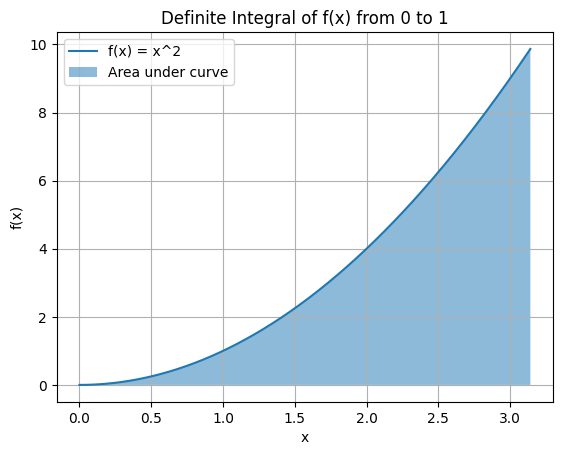

In [49]:
# Generate sample points
x = np.linspace(0, np.pi, 1000)
y = x**2
# Define the function to integrate

# Plotting the function and the area under the curve
import matplotlib.pyplot as plt
# Plot the function
plt.plot(x, y, label='f(x) = x^2')
plt.fill_between(x, y, alpha=0.5, label='Area under curve')
plt.title('Definite Integral of f(x) from 0 to 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [50]:
import numpy as np
from sympy import symbols, integrate, lambdify
import time
import tracemalloc

import scipy.integrate as spi
# Measure the time and memory consumption for each method.

def scipy_integral():
    f = lambda x: x**2
    result, _ = spi.quad(f, 0, 1)
    return result

def sympy_integral():
    x = symbols('x')
    f = x**2
    result = integrate(f, (x, 0, 1))
    return float(result)

def numpy_integral():
    x = np.linspace(0, 1, 1000)
    f = x**2
    result = np.trapezoid(f, x)
    return result

def measure_performance(func):
    tracemalloc.start()
    start_time = time.time()
    result = func()
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return result, end_time - start_time, peak / 1024  # Memory in KB

scipy_perf = measure_performance(scipy_integral)
sympy_perf = measure_performance(sympy_integral)
numpy_perf = measure_performance(numpy_integral)

print(f"SciPy: Result={scipy_perf[0]}, Time={scipy_perf[1]:.6f}s, Memory={scipy_perf[2]:.2f}KB")
print(f"SymPy: Result={sympy_perf[0]}, Time={sympy_perf[1]:.6f}s, Memory={sympy_perf[2]:.2f}KB")
print(f"NumPy: Result={numpy_perf[0]}, Time={numpy_perf[1]:.6f}s, Memory={numpy_perf[2]:.2f}KB")

SciPy: Result=0.33333333333333337, Time=0.000146s, Memory=2.41KB
SymPy: Result=0.3333333333333333, Time=0.029610s, Memory=57.54KB
NumPy: Result=0.333333500333834, Time=0.000934s, Memory=40.03KB


In [51]:
%%timeit -r 10 -n 1000
scipy_integral()

11.1 µs ± 478 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [52]:
%%timeit -r 10 -n 1000
sympy_integral()

5.38 ms ± 420 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [53]:
%%timeit -r 10 -n 1000
numpy_integral()

35.3 µs ± 3.64 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


Дополнительно вы можете прочитать о волшебных командах для профилирования в JN: https://www.geeksforgeeks.org/magic-commands-for-profiling-in-jupyter-notebook/

### Упражнение 4.

Сравните и проанализируйте полученные результаты

*   **SciPy:** Самый быстрый для численного интегрирования.
*   **SymPy:** Самый медленный, обеспечивает точные аналитические решения.
*   **NumPy:** Между двумя, но менее оптимизированный для интегрирования, чем SciPy.

Выбор: SciPy для скорости, SymPy для точности, NumPy для удобства, когда скорость не важна.

## 4. Практическое применение: Ипотечный калькулятор

В этом разделе мы рассчитаем общую сумму процентов, выплачиваемых по ипотеке, используя интегральные методы.

На самом деле с ипотечными калькуляторами дело обстоит плохо: многие онлайн-калькуляторы для одних и тех же данных дают разные результаты. Давайте попробуем написать свой простой калькулятор.

*Что ещё полезно помнить про ипотеку и почему важно знать интегралы*: несмотря на то, что месячные платежи будут постоянными (если Вы не начнёте досрочно погашать кредит), сам платёж будет состоять из суммы, которая пойдёт на погашение кредита, + суммы по процентам. При этом соотношение частей в тело и в проценты будет меняться со временем, например, вначале Ваш месячный платёж по ипотеке на 90% состоит из суммы, которая идёт на погашение процентов и только на 10% на погашение тела кредита. В конце срока, соотношение будет обратным: 10% - проценты и 90% - в тело кредита. Проценты рассчитываются от оставшегося тела кредита. Выгодно ли досрочно закрывать ипотеку? Это зависит от многих факторов, в особенности от инфляции, потому что изначально Вы покупаете недвижимость на деньги банка, а свои деньги вкладываете со временем (например через 30 лет). Однако, экономическая обстановка может быть разной и надежнее, разумеется, выплатить ипотеку раньше, чтобы иметь недвижимость в собственности, а не в залоге у банка.

In [55]:
# Define the mortgage payment function
def mortgage_payment(principal, rate, time):
    return principal * rate * np.exp(-rate * time)

# Parameters
principal = 500_000  # Loan amount in dollars
rate = 0.04          # Annual interest rate

# Calculate the total interest paid over 30 years
total_interest, error = quad(lambda t: mortgage_payment(principal, rate, t), 0, 30)
print("Total Interest Paid:", total_interest)

Total Interest Paid: 349402.8940438989


### Упражнение 5
Измените в ячейке выше `principal" на 500 000 долларов, а "rate" на 4%. Пересчитайте общую сумму процентов, выплаченных за 30 лет.

## Упражнение 6* (дополнительное, если успели сделать все предыдущие И последующие упражнения).

Посчитайте какую сумму по процентам Вы заплатите по ипотеке, если время от времени будете платить за ипотеку больше месячного платежа в уплату тела кредита. Решение представьте в ячейке ниже.

In [ ]:
# YOUR CODE HERE

## 5. Практическое применение: Сценарий строительства дома

### 5.1. Общая стоимость строительства дома с течением времени
В этом разделе мы рассчитаем общую стоимость строительства дома на основе изменения стоимости материалов с течением времени.

In [58]:
# Define the material cost function
def material_cost(t):
    return (100 + 10 * np.sin(0.5 * t)) * np.exp(0.05*t)

# Calculate the total cost over 12 months
total_cost, error = quad(material_cost, 0, 12)
print("Total Material Cost:", total_cost)

Total Material Cost: 1628.3869640657538


### Упражнение 7
Измените функцию material_cost в ячейке выше, включив в нее коэффициент экспоненциального роста. Пересчитайте общую стоимость за 12 месяцев.

### 5.3 Площадь и объем дома

Логично, что площадь и объём дома можно посчитать не прибегая к интегралам для большинства случаев. Так и поступим здесь. Однако, площадь прямоугольника - это самый простейший случай определённого интеграла для постоянной функции.

Так, если, например, стена Вашего дома изгибается волной, как на фото ниже, то для точного расчёта его площади без интеграла уже не обойтись.
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [57]:
# Define the dimensions of the house
length = 10  # Length in meters
width = 8    # Width in meters
height = 3   # Height in meters
# Calculate the area of the house
area = length * width
# Calculate the volume of the house
volume = length * width * height
# Print the results
print("Area of the house:", area, "m^2")
print("Volume of the house:", volume, "m^3")

Area of the house: 80 m^2
Volume of the house: 240 m^3


## Упражнение 8* (дополнительное, если успели сделать все предыдущие И последующие упражнения)

Выберите любой проект дома по картинке в интернете и посчитайте его площадь. Например для домов ниже, можно использовать метод Люстерника-Диткина.

- Замените это изображение, если выбрали другой дом.
- Замените код в ячейке ниже, чтобы рассчитать площадь дома.

![image.png](attachment:image.png)


In [ ]:
# YOUR CODE HERE

# CODE EXAMPLE 1: Calculate the area of a hexagon house
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
# Define the vertices of the hexagon
vertices = np.array([[0, 0], [1, 0], [1.5, np.sqrt(3)/2], [1, np.sqrt(3)], [0, np.sqrt(3)], [-0.5, np.sqrt(3)/2]])
# Define the area function for the hexagon
def area_function(x, y):
    # Example area function for a hexagon
    # This is a placeholder; replace with the actual area function
    return 0.5 * (x * y)  # Placeholder for the area of a hexagon

area, error = dblquad(area_function, 0, 1, lambda x: 0, lambda x: np.sqrt(3) * (1 - x))
print("Hexagon Area:", area)

# CODE EXAMPLE 2: Calculate the area of a hexagon house using Lusternik-Ditkin method
vertices = np.array([[0, 0], [1, 0], [1.5, np.sqrt(3)/2], [1, np.sqrt(3)], [0, np.sqrt(3)], [-0.5, np.sqrt(3)/2]])
# Calculate the area using the Lusternik-Ditkin method
def lusternik_ditkin(vertices):
    n = len(vertices)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += vertices[i][0] * vertices[j][1] - vertices[j][0] * vertices[i][1]
    return abs(area) / 2.0
area = lusternik_ditkin(vertices)
print("Hexagon Area (Lusternik-Ditkin):", area)

### 5.4 Анализ теплового потока.

Здесь речь идёт о замерах продуваемости дома в различных его участках в зависимости от используемых материалов. Это важно, чтобы верно рассчитать материалы, их последовательность и углы примыкания, чтобы дома была комфортная температура, счета за электричество/отопление/охлаждение были низкими, а материалы не изнашивались из-за неподходящих климатических и температурных режимов.

Аналогичные расчёты можно провести, например, для анализа освещённости. Пример показан на изображении ниже.
![image.png](attachment:image.png)

Heat flow: 50.0 W
Total heat flow using trapezoidal rule: 250.0 W


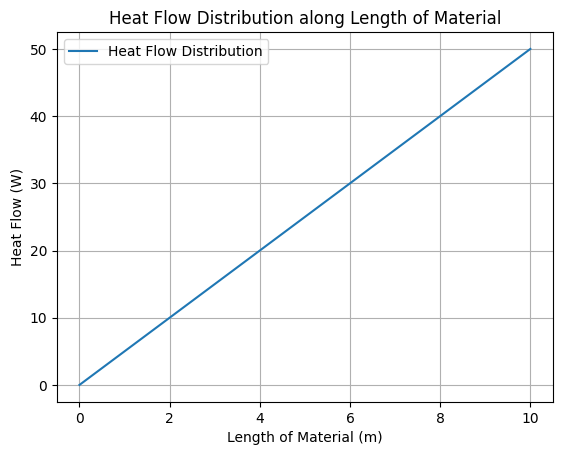

In [59]:
# Define the thermal conductivity of the material (W/m·K)
thermal_conductivity = 0.5  # Example value
# Define the temperature difference (K)
temperature_difference = 50  # Example value
# Define the area through which heat flows (m^2)
area = 2.0  # Example value
# Calculate the heat flow (W) using Fourier's law of heat conduction
heat_flow = thermal_conductivity * area * temperature_difference
# Print the result
print("Heat flow:", heat_flow, "W")

#Apply the trapezoidal rule to calculate heat flow analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
# Define the thermal conductivity of the material (W/m·K)
thermal_conductivity = 0.5  # Example value
# Define the temperature difference (K)
temperature_difference = 50  # Example value
# Define the area through which heat flows (m^2)
area = 2.0  # Example value
# Define the length of the material (m)
length = 10  # Example value
# Define the number of intervals for the trapezoidal rule
num_intervals = 100
# Create an array of x values (length of the material)
x = np.linspace(0, length, num_intervals)
# Calculate the temperature gradient (K/m) using a linear function
temperature_gradient = np.linspace(0, temperature_difference, num_intervals)
# Calculate the heat flow at each point using Fourier's law of heat conduction
heat_flow = thermal_conductivity * area * temperature_gradient
# Use the trapezoidal rule to calculate the total heat flow
total_heat_flow = trapezoid(heat_flow, x)
# Print the result
print("Total heat flow using trapezoidal rule:", total_heat_flow, "W")
# Plot the heat flow distribution along the length of the material

plt.plot(x, heat_flow, label="Heat Flow Distribution")
plt.xlabel("Length of Material (m)")
plt.ylabel("Heat Flow (W)")
plt.title("Heat Flow Distribution along Length of Material")
plt.legend()
plt.grid()
plt.show()

### Упражнение 9* (дополнительное, если успели сделать все предыдущие И последующие упражнения)

Рассчитайте значение теплового потока для каждого блока стены и постройте тепловую карту **в ячейке ниже**.

In [ ]:
# YOUR CODE HERE

### 5.5. Площадь крыши

Расчёт площади крыши представляет из себя особенную трудность в случае, если она не плоская, и отдельно - если она не прямая.
*Впрочем, плоская крыша - это большая головная боль для инженеров проектировщиков, строителей, а также для жильцов из-за инженерных особенностей.*

Давайте попробуем рассчитать площадь простой односкатной крыши:

In [60]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the constants for the sloped roof
a, b, c = sp.symbols('a b c')

# Define the limits of integration
x_min, x_max = 0, 10
y_min, y_max = 0, 5

# Define the function to integrate (height of the roof)
f = a*x + b*y + c

# Set up the double integral
integral = sp.integrate(f, (y, y_min, y_max), (x, x_min, x_max))

# Display the result
print(f"The area of the roof is: {integral} square units")

The area of the roof is: 250*a + 125*b + 50*c square units


А теперь для крыши с нелинейным скатом:

In [61]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the constants for the non-linear roof
a, b, c = sp.symbols('a b c')

# Define the limits of integration
x_min, x_max = 0, 10
y_min, y_max = 0, 5

# Define the function to integrate (height of the roof)
f = a*x**2 + b*y**2 + c

# Set up the double integral
integral = sp.integrate(f, (y, y_min, y_max), (x, x_min, x_max))

# Display the result
print(f"The area of the roof is: {integral} square units")

The area of the roof is: 5000*a/3 + 1250*b/3 + 50*c square units


Как на счёт таких крыш?

![image.png](attachment:image.png)

![image-3.png](attachment:image-3.png)

### Упражнение 10* (дополнительное, если успели сделать все предыдущие И последующие упражнения)

Поразмышляйте о том, как посчитать количество черепицы для такой крыши

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

### 5.6. Ремонт

В приведённых ниже упражнениях 11-13 используйте методы численного интегрирования, изученные ранее.

По собственному усмотрению можете модифицировать задания, чтобы класть плитку, красить краской, клеить сайдинг и пр. В таком случае необходимо рассчитать требуемое количество соответствующего материала.

### Упражнение 11

Вы решили сделать ремонт в комнате, ширина которой 5 метров, длина 7 метров, а высота потолков 2.20м. Вы выбрали обои шириной 1.5 метра и длиной 10 метров. В комнате есть 2 окна шириной 2 метра и высотой 1 метр. Дверь в комнату имеет высоту 2 метра и ширину 1 метр. Рассчитайте необходимое количество рулонов обоев. При недостатке данных примите необходимые допущения.
![image.png](attachment:image.png)

In [63]:
# Параметры комнаты и обоев
room_width = 5       # м
room_length = 7      # м
room_height = 2.20   # м

roll_width = 1.5     # м
roll_length = 10     # м

# Параметры отверстий:
# 2 окна по 2x1 м и 1 дверь 1x2 м
openings_area = 2*(2*1) + (1*2)  # 4 + 2 = 6 м²

# 1. Численная аппроксимация площади стен через интеграл по периметру:
# Создадим массив x от 0 до P (периметра)
P = 2 * (room_width + room_length)  # 24 м
x = np.linspace(0, P, 1000)
# Функция высоты стен (на каждом участке равна room_height)
f = room_height * np.ones_like(x)

# Численный интеграл методом трапеций:
total_area_numerical = np.trapezoid(f, x)

# Вычитаем площадь отверстий:
net_area = total_area_numerical - openings_area

# 2. Площадь одного рулона:
roll_area = roll_width * roll_length  # 15 м²

# 3. Количество рулонов (округляем вверх):
rolls_needed = np.ceil(net_area / roll_area)

print("Площадь стен (интегрально):", total_area_numerical, "м²")
print("Неоклеиваемая площадь (отверстия):", openings_area, "м²")
print("Площадь для оклейки:", net_area, "м²")
print("Количество рулонов обоев:", int(rolls_needed))

Площадь стен (интегрально): 52.8 м²
Неоклеиваемая площадь (отверстия): 6 м²
Площадь для оклейки: 46.8 м²
Количество рулонов обоев: 4


### Упражнение 12
Вы решили поклеить обои в комнате на чердаке. Ширина комнаты 5 метров, длина комнаты 7 метров. Высота потолков изменяется от 1 метра до 3 метров. В комнате есть 2 окна шириной 2 метра и высотой 1 метр. Дверь в комнату имеет высоту 2 метра и ширину 1 метр. Вы выбрали обои шириной 1.5 метра и длиной 10 метров. Рассчитайте необходимое количество рулонов обоев. При недостатке данных примите необходимые допущения.

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

In [65]:
# Параметры комнаты
room_width = 5       # м, по оси x
room_length = 7      # м, по оси y

# Функция для высоты потолка (линейное изменение от 1 до 3 м по оси x)
def ceiling_height(x):
    return 1 + ((3 - 1) / room_width) * x  # 1 + 0.4*x

# Интегрируем по x для расчёта площади наклонных стен (при y = 0 и y = 7)
area_front, _ = quad(ceiling_height, 0, room_width)
area_back = area_front  # Симметрично

# Стены при x = 0 и x = room_width имеют постоянную высоту
area_left = room_length * ceiling_height(0)         # x = 0
area_right = room_length * ceiling_height(room_width) # x = 5

# Общая площадь стен до вычета отверстий
total_wall_area = area_front + area_back + area_left + area_right

# Вычитаем площадь двух окон (2 м * 1 м) и одной двери (1 м * 2 м)
openings_area = 2 * (2 * 1) + (1 * 2)

# Чистая площадь, подлежащая оклейке
net_area = total_wall_area - openings_area

# Параметры рулона обоев
roll_width = 1.5  # м
roll_length = 10  # м
roll_area = roll_width * roll_length

# Количество необходимых рулонов (округление вверх)
rolls_needed = np.ceil(net_area / roll_area)

print("Общая площадь стен:", total_wall_area, "м²")
print("Площадь для оклейки:", net_area, "м²")
print("Необходимое количество рулонов:", rolls_needed)

Общая площадь стен: 48.0 м²
Площадь для оклейки: 42.0 м²
Необходимое количество рулонов: 3.0


### Упражнение 13
Вы решили поклеить обои в комнате, напоминающей формой дом хоббита (альтернативно, это может быть чердак дома в стиле второй империи). В комнате 2 круглые двери радиусом 0,8 метра и два окна радиусом 0,3 метра. Размеры комнаты по полу (прямоугольный) 5 метров и 7 метров. Вы выбрали обои шириной 1.5 метра и длиной 10 метров. Высота потолка в центре комнаты 2,5 метра. Рассчитайте необходимое количество рулонов, если клеить как стены, так и потолок. При недостатке данных примите необходимые допущения.

![image.png](attachment:image.png)

In [78]:
# Параметры комнаты
room_length = 7  # м
room_width = 5   # м
max_height = 2.5 # м (в центре)

# Параметры обоев
roll_width = 1.5  # м
roll_length = 10  # м
roll_area = roll_width * roll_length  # 15 м²

# Параметры отверстий
door_radius = 0.8  # м (2 двери)
window_radius = 0.3  # м (2 окна)

# Допущения:
# 1. Форма потолка - параболический свод (квадратичная функция)
# 2. Стены плавно переходят в потолок

def ceiling_height(x, y):
    """Функция высоты потолка в точке (x,y)"""
    # Нормированные координаты от центра (0,0) до краёв (1,1)
    nx = 2*x/room_width - 1
    ny = 2*y/room_length - 1

    # Параболический свод (можно изменить на другую функцию)
    return max_height * (1 - 0.5*(nx**2 + ny**2))

def wall_area_integrand(y, x):
    """Подынтегральная функция для площади стен"""
    return math.sqrt(1 + (ceiling_height(x+0.001, y) - ceiling_height(x-0.001, y))**2/(0.002)**2 +
                       (ceiling_height(x, y+0.001) - ceiling_height(x, y-0.001))**2/(0.002)**2)

# Вычисление площади стен и потолка с помощью двойного интеграла
def total_surface_area():
    # Интегрируем по всем стенам
    area = 0

    # Длинные стены (7м)
    def long_wall(x):
        res, _ = quad(lambda y: wall_area_integrand(y, x), 0, room_length)
        return res

    area += 2 * quad(long_wall, 0, room_width)[0]  # Две длинные стены

    # Короткие стены (5м)
    def short_wall(y):
        res, _ = quad(lambda x: wall_area_integrand(y, x), 0, room_width)
        return res

    area += 2 * quad(short_wall, 0, room_length)[0]  # Две короткие стены

    # Площадь потолка
    def ceiling_area(x, y):
        return 1  # Интегрируем единицу по площади

    area += quad(lambda x: quad(lambda y: ceiling_area(x, y), 0, room_length)[0], 0, room_width)[0]

    return area

# Площадь отверстий (2 двери и 2 окна)
openings_area = 2 * np.pi * door_radius**2 + 2 * np.pi * window_radius**2

# Общая площадь для оклейки
total_area = total_surface_area() - openings_area

# Количество рулонов
rolls_needed = np.ceil(total_area / roll_area)

print(f"Общая площадь поверхности: {total_area:.2f} м²")
print(f"Площадь отверстий: {openings_area:.2f} м²")
print(f"Чистая площадь для оклейки: {total_area - openings_area:.2f} м²")
print(f"Необходимое количество рулонов: {rolls_needed}")

Общая площадь поверхности: 201.03 м²
Площадь отверстий: 4.59 м²
Чистая площадь для оклейки: 196.45 м²
Необходимое количество рулонов: 14.0


### Заключительное упражнение
- Обобщите свои выводы и напишите краткий отчет о том, какой метод вы бы порекомендовали для различных сценариев.
- Что нового Вы узнали для себя на сегодняшнем занятии?

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*